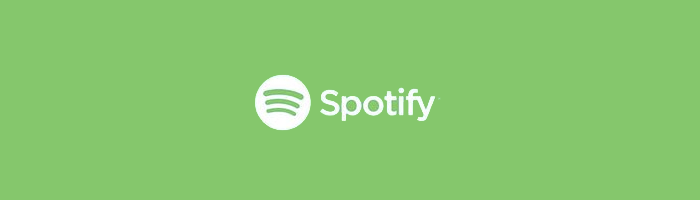

In [ ]:
#@title CPS 4801 Final Project (Anthony, Bianca, Justin)
import urllib.request
from PIL import Image
  
urllib.request.urlretrieve(
  'https://d3.harvard.edu/platform-rctom/wp-content/uploads/sites/4/2018/11/spotify-banner-700x200.png',
   "banner.png")
  
img = Image.open("banner.png")
img.show()

# Dataset 

### Data Loading

In [ ]:
##Data Visualization

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import os

os.chdir('/content/')

In [ ]:
#Mount to Google Drive (MUST HAVE PROJECT FOLDER ADDED TO YOUR "My Drive")

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


%cd /content/drive/MyDrive/AI_Spotify_Project

Mounted at /content/drive/
/content/drive/MyDrive/AI_Spotify_Project


In [ ]:
import pandas as pd
import io
from collections import Counter
df = pd.read_csv("/content/drive/MyDrive/AI_Spotify_Project/spotify.csv")
#print(df)

### Data Preprocessing and Handling [Anthony]

In [ ]:
#@title Asking For User Input, Removing Stop Words, & Creating Genre Specific Dataset [Anthony]
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import re
import seaborn as sns
from nltk.corpus import stopwords

#Read the spotify csv file and rename the 'Song Name' column as 'SongName' for easier handling in the code
df = pd.read_csv("/content/drive/MyDrive/AI_Spotify_Project/spotify.csv")
df = df.rename(columns={'Song Name': 'SongName'})

#Prompt the User to Select a Music Genre
def user_choice(choices):
    print("Please Choose a Music Genre:")
    for number, i in enumerate(choices):
        print(str(number + 1) + ". " + i)
    x = input("Enter the number of the Genre you want: ")
    try:
        if 0 < int(x) <= len(choices):
            return int(x) - 1
    except:
        pass
    return None

choices = ["Hip Hop", "Pop", "Rock", "Latin", "EDM", "Trap", "Drill", "Reggaeton", "R&B", "Rap"]
uc = user_choice(choices)

#Manually add our own stopwords to the nltk english stopword list.
sw = stopwords.words('english')
song_sw = ["s", "(", ")", "(feat.", "&", "(with", "-", "remix", "version", "feat", "()"]
sw.extend(song_sw)

#Print a List of Genre Choices for the user
print(choices[uc])
value = choices[uc].lower()
genre_data = df[df['Genre'].str.contains(value)]
songs = genre_data['SongName'].apply(lambda title:" ".join([content for content in title.split() if content not in (sw)]))


#List of most frequent words for selected genre
table = songs.str.split(expand=True).stack().value_counts()
words = table.index.tolist()

print(table)


Please Choose a Music Genre:
1. Hip Hop
2. Pop
3. Rock
4. Latin
5. EDM
6. Trap
7. Drill
8. Reggaeton
9. R&B
10. Rap
Enter the number of the Genre you want: 2
Pop
You         48
Me          41
The         34
Love        26
Remix       24
            ..
LOST         1
CHIAMAMI     1
PER          1
NOME         1
Mendes]      1
Length: 1399, dtype: int64


### Data Visualization [Bianca]

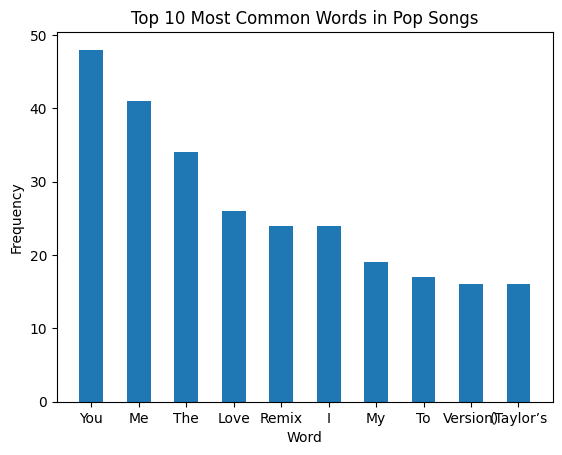

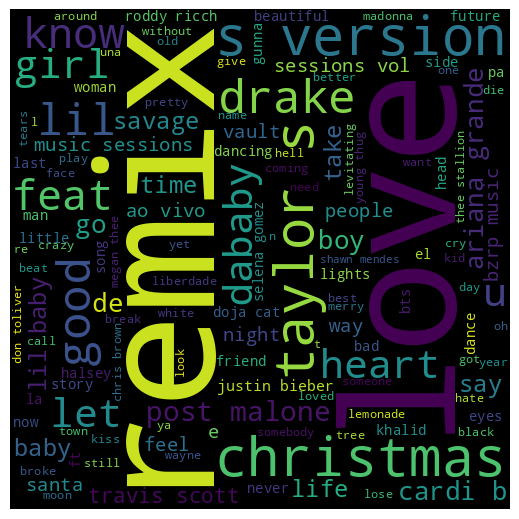

In [ ]:
#@title Word Cloud [Anthony] & Common Word Histogram [Bianca]
#Handle the most frequent words using numpy functions and visualize them with plt
np_word = table.index.to_numpy()
np_freq = table.to_numpy()

x = np_word
y = np_freq

plt.bar(x[0:10],y[0:10], align='center', width=0.5)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title(f'Top 10 Most Common Words in {choices[uc]} Songs')
plt.show()

#Initialize words variable and attempt to further remove stop words with built-in function
words = ""
stopwords = set(STOPWORDS)

#Main function to generate the word cloud
for x in songs:
    x = str(x)
    token = x.split()
    for y in range(len(token)):
        token[y] = token[y].lower()
    words += " ".join(token) + " "

wordCloud = WordCloud(width = 500, height = 500, stopwords = stopwords, min_font_size = 10).generate(words)

#More plt visualization                  
plt.figure(figsize = (5, 5))
plt.imshow(wordCloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
#@title User Word Title Prompt [Bianca]
chosenWords = input('View the word cloud above and choose three words that you would like:\n **Note that each word shuold be seperated by a space, no need for commas: \t')
chosenWords = chosenWords.split(' ',3)

In [ ]:
#@title View Top Twenty for Specific Genere [Bianca]
sorted_df = genre_data.sort_values('Popularity', ascending = False).head(100);
top_twenty = sorted_df.head(20);
top_twenty

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,SongName,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",...,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
9,10,8,10,2021-07-02--2021-07-09,I WANNA BE YOUR SLAVE,"24,551,591",Måneskin,3377762,4pt5fDVTg5GhEvEtlz9dKk,"['indie rock italiano', 'italian pop']",...,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958,C#/Db
14,15,2,10,2021-05-21--2021-05-28,Butter,"19,985,713",BTS,37106176,2bgTY4UwhfBYhGT4HUYStN,"['k-pop', 'k-pop boy group']",...,0.759,0.459,-5.187,0.0948,0.00323,0.0906,109.997,164442,0.695,G#/Ab
12,13,5,3,2021-07-09--2021-07-16,Permission to Dance,"22,062,812",BTS,37106176,0LThjFY2iTtNdd4wviwVV2,"['k-pop', 'k-pop boy group']",...,0.702,0.741,-5.33,0.0427,0.00544,0.337,124.925,187585,0.646,A
7,8,2,10,2021-06-18--2021-06-25,Todo De Ti,"26,951,613",Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",...,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342,D#/Eb
63,64,2,34,2021-02-26--2021-03-05,Save Your Tears,"8,843,110",The Weeknd,35305637,37BZB0z9T8Xu7U3e65qxFy,"['canadian contemporary r&b', 'canadian pop', ...",...,0.65,0.825,-4.645,0.0325,0.0215,0.0936,118.091,191014,0.593,C
13,14,1,19,2021-04-02--2021-04-09,Peaches (feat. Daniel Caesar & Giveon),"20,294,457",Justin Bieber,48504126,4iJyoBOLtHqaGxP12qzhQI,"['canadian pop', 'pop', 'post-teen pop']",...,0.677,0.696,-6.181,0.119,0.321,0.42,90.03,198082,0.464,C


Counter({'Olivia Rodrigo': 10, 'Doja Cat': 5, 'BTS': 4, 'The Weeknd': 4, 'Ed Sheeran': 3, 'Ariana Grande': 3, 'Lil Nas X': 2, 'Måneskin': 2, 'Rauw Alejandro': 2, 'Harry Styles': 2, 'Sech': 2, 'Dua Lipa': 2, 'Maroon 5': 2, 'The Neighbourhood': 2, 'Imagine Dragons': 2, 'Billie Eilish': 2, 'Avicii': 2, 'Justin Bieber': 1, 'Bruno Mars, Anderson .Paak, Silk Sonic': 1, 'Riton, Nightcrawlers': 1, 'Sebastian Yatra, Myke Towers': 1, 'TINI, Maria Becerra': 1, 'Tiësto': 1, 'Marshmello': 1, 'Galantis': 1, 'Doja Cat, The Weeknd': 1, 'Sech, Jhay Cortez': 1, 'Bizarrap, Nicky Jam': 1, 'OneRepublic': 1, 'Megan Thee Stallion': 1, 'Camila Cabello': 1, 'Kali Uchis': 1, 'Joel Corry, RAYE, David Guetta': 1, 'Joel Corry': 1, 'Drake': 1, 'Justin Wellington, Small Jam': 1, 'Giveon': 1, 'Rauw Alejandro, Mr. Naisgai': 1, 'Becky G, El Alfa': 1, 'dhruv': 1, 'Conan Gray': 1, 'Tate McRae': 1, 'Madison Beer': 1, 'Natti Natasha, Becky G': 1, 'Lewis Capaldi': 1, 'WILLOW': 1, 'Ofenbach': 1, 'MEDUZA': 1, 'Coldplay': 1, '

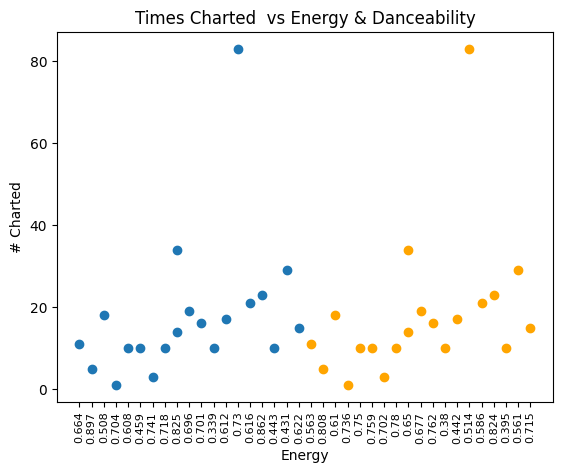

In [ ]:
#@title Scatter Plot Correlation between fields and results. [ Bianca]
#plt.figure(1)
plt.plot(top_twenty['Energy'], top_twenty['Number of Times Charted'], 'o')
#plt.title('Number of Times Charted & Artist'); plt.xlabel('Energy'); plt.ylabel('# Charted')
#plt.xticks(rotation=90,fontsize=8);


#plt.figure(2)
plt.plot(top_twenty['Danceability'], top_twenty['Number of Times Charted'], 'o', color = 'orange')
#plt.plot(top_twenty['Tempo'], top_twenty['Number of Times Charted'], 'o-') #gotta normalize this
plt.title('Times Charted  vs Energy & Danceability'); plt.xlabel('Energy'); plt.ylabel('# Charted')
plt.xticks(rotation=90,fontsize=8);

x = Counter(sorted_df['Artist'])
print(x)


Text(0.5, 1.0, 'Number of Times Charted & Artist')

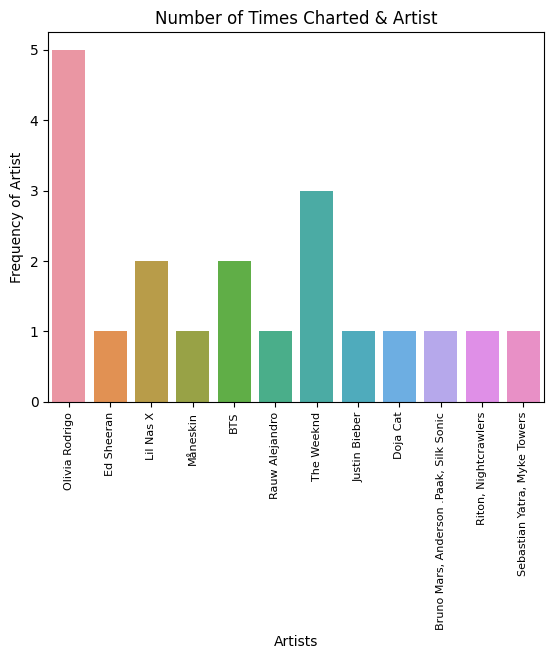

In [ ]:
#@title Seaborn Bar Chart regarding frequency of Top Twenty Artists [Bianca]
sns.countplot(x ='Artist', data = top_twenty); plt.xticks(rotation=90,fontsize=8);
plt.xlabel('Artists'); plt.ylabel('Frequency of Artist'); plt.title('Number of Times Charted & Artist')

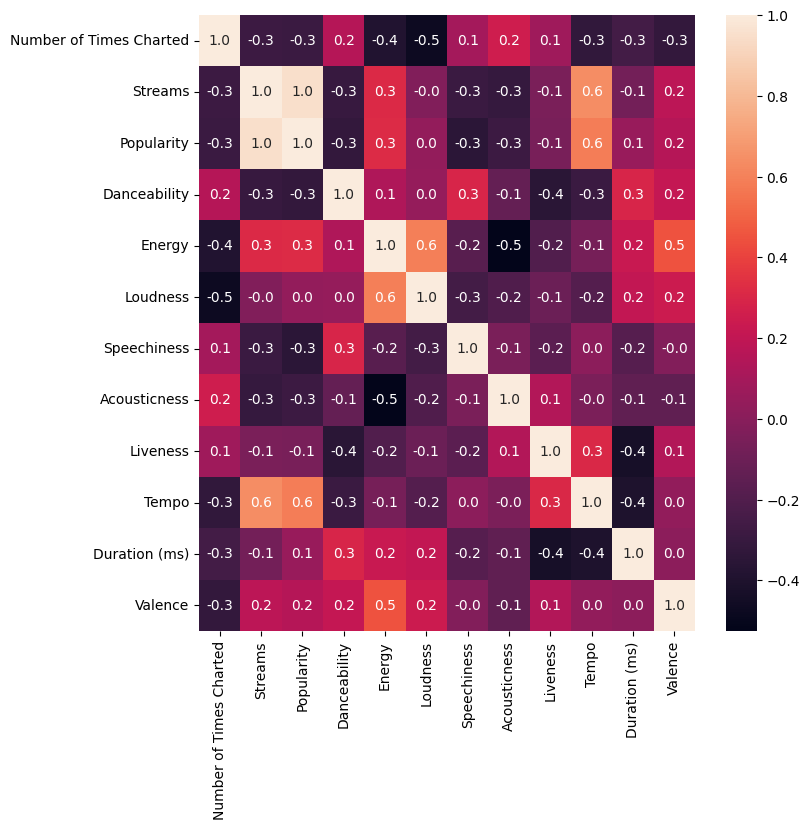

In [ ]:
#@title Heatmap comparing multiple labels against another using Seaborn [Bianca]
top_twenty= top_twenty.fillna('')
top_twenty=top_twenty.replace(' ', '')
top_twenty['Streams']=top_twenty['Streams'].str.replace(',','')

test = top_twenty[['Number of Times Charted', 'Streams', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       ]] = top_twenty[['Number of Times Charted', 'Streams', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       ]].apply(pd.to_numeric)

f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(test.corr(),annot = True,fmt = ".1f",ax = ax)
plt.show()

Intercept coefficient: [10.87035425]
Regression coefficients:  [[3.59186815e-05]]
R^2 coefficient: 0.0031213980792244023
Adjusted R^2 coefficient: -0.0522607464719298


Text(0.5, 1.0, 'Duration Predicting Number of times Charting')

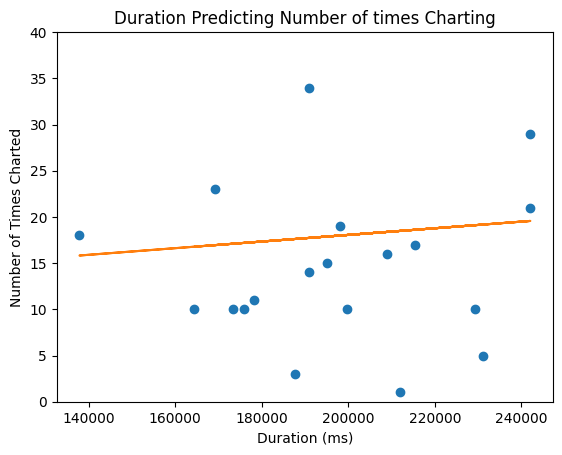

In [ ]:
#@title Linear Regression [Bianca]
from sklearn.linear_model import LinearRegression
y = top_twenty[['Number of Times Charted']]
# Predictor Variables (Independent Variable)
x = top_twenty[[ 'Duration (ms)']].apply(pd.to_numeric) # 'Danceability', 'Energy', 'Loudness', 'Speechiness','Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',

lin_model = LinearRegression()
lin_model.fit(x,y)

print("Intercept coefficient:",lin_model.intercept_)
print("Regression coefficients: ",lin_model.coef_)
print("R^2 coefficient:", lin_model.score(x,y))
adjR2 = 1 - ( 1-lin_model.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
print("Adjusted R^2 coefficient:",adjR2)
y_fit = (lin_model.coef_ * x) + lin_model.intercept_ 
plt.plot(x,y,'o',x,y_fit, '-'); plt.ylim(0,40); plt.ylabel('Number of Times Charted'); plt.xlabel('Duration (ms)'); plt.title('Duration Predicting Number of times Charting')

# Method Implementation (Decision Tree Classifier) [Justin] 


## Explain The Algorithm You Used: 

For this project, we chose to use a decision tree algorithm. We chose this algorithm because it is relatively simple in structure, and is highly compatible with the types of visualizations and interpretations that we would need to reflect our initial project proposal. Decision Trees are especially good at helping to determine significant values within them, which transfers well to our goal of finding the highest frequencies of words within song titles.

To implement Decision Tree with our project, we first retrieve a list of the individual words present within the song titles for a particular genre along with how frequent each word is. For our model, the words represent the attributes while the frequencies represent the label. We use an 80/20 split on our dataset into training and testing subgroups and test the model using the test portion to see how accurate the model is in determining how frequent a word might be based on the characteristics of the training words (which it has associated frequencies for). 

In [ ]:
!pip install nltk

In [ ]:
#Enter "d" and then type "punkt". Don't choose the "list". Press "q" to quit.
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt


      Unzipping tokenizers/punkt.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
print(words[4])

i


In [ ]:
#Store songs in an 1D array (series)
songs = []

i = 0

#Label the words in song titles using their frequency count

while i < table.size-1:
  for word in words:
    title = words[i]
    frequency = table[i]
    if frequency >= 4:
      p = "Popular"
    elif frequency >= 2:
      p = "Common"
    else: p = "Uncommon"
  
    songs.append([title, p])
    i+=1


In [ ]:
print(songs[1][0])
print(songs[1][1])

Me
Popular


In [ ]:
from sklearn.model_selection import train_test_split

train_songs, test_songs = train_test_split(songs, test_size=0.2)
print(len(train_songs[2][0]))

6


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

x_train = vectorizer.fit_transform([song for song, label in train_songs])
y_train = [label for song, label in train_songs]

x_test = vectorizer.transform([song for song, label in test_songs])
y_test = [label for song, label in test_songs]

In [ ]:
print(x_train)
x_train_array = x_train.toarray()
print(x_train_array.shape)

  (0, 536)	1
  (1, 133)	1
  (2, 33)	1
  (3, 909)	1
  (4, 731)	1
  (6, 80)	1
  (7, 125)	1
  (8, 450)	1
  (9, 681)	1
  (11, 148)	1
  (12, 234)	1
  (13, 238)	1
  (14, 56)	1
  (15, 142)	1
  (16, 820)	1
  (17, 161)	1
  (18, 545)	1
  (19, 323)	1
  (20, 886)	1
  (21, 293)	1
  (22, 108)	1
  (23, 717)	1
  (24, 942)	1
  (25, 19)	1
  (26, 153)	1
  :	:
  (1095, 534)	1
  (1096, 716)	1
  (1097, 605)	1
  (1098, 835)	1
  (1099, 364)	1
  (1100, 718)	1
  (1100, 263)	1
  (1101, 654)	1
  (1102, 316)	1
  (1103, 332)	1
  (1104, 187)	1
  (1105, 114)	1
  (1106, 683)	1
  (1107, 575)	1
  (1108, 990)	1
  (1109, 731)	1
  (1110, 423)	1
  (1111, 951)	1
  (1112, 764)	1
  (1113, 847)	1
  (1114, 726)	1
  (1115, 357)	1
  (1116, 523)	1
  (1117, 760)	1
  (1118, 770)	1
(1119, 1000)


In [ ]:
print(y_train)

['Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Common', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Common', 'Uncommon', 'Uncommon', 'Popular', 'Uncommon', 'Common', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Common', 'Uncommon', 'Common', 'Uncommon', 'Common', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Common', 'Popular', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Common', 'Uncommon', 'Common', 'Common', 'Popular', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Common', 'Uncommon', 'Uncommon', 'Uncommon', 'Popular', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Common', 'Uncommon', 'Common', 'Uncommon', 'Uncommon', 'Popular', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon', 'Uncommon'

In [ ]:
# Decision Tree and Random Forest

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()

clf.fit(x_train,y_train)

#Use the classifier to predict the labels of the test set
y_pred = clf.predict(x_test)

#Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

#Print the Prediction
print(y_pred)

#Print the accuracy of the classifier
print("Accuracy:", accuracy)

['Popular' 'Uncommon' 'Uncommon' 'Uncommon' 'Popular' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon'
 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommon' 'Uncommo

In [ ]:
#@title Making a Title
!pip install keytotext
from keytotext import pipeline
nlp = pipeline("mrm8488/t5-base-finetuned-common_gen")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB

INFO:lightning_fabric.utilities.seed:Global seed set to 42


In [ ]:
#@title Results
print('Here are your chosen words: ', chosenWords, '\n Here is your song title: \t')
nlp(chosenWords)

Here are your chosen words:  ['say', 'love', 'night'] 
 Here is your song title: 	


'i want to say i love you at night.'

# Result Analysis / Plans [Justin]


Analysis of the Results and any modifications or plans before final report deadline:

Our results show that the model predicts most words to be in the unique popularity range, with a select few being "Uncommon". Based on the criteria we set for popularity, this means it expects most words to appear in the top songs only once. These results are inaccurate because we have not yet removed stopwords from the training and testing data. For this project, stopwords must include phrases like "feat." or artist names which are not part of song titles and are unique which impacts the results of our data (For example, if there is one song by artist Dua Lipa in the training set, her first and last name will be trained as unique frequency words). For our final submission, we intend to remove these stopwords and increase the accuracy of our results.

Following the adjustments to our prediction method, we aim to apply the method to other attributes of songs such as their genre or tempo. By predicting multiple attributes, we can use the results to assemble a hypothetical song based on predicted output. These hypothetical songs can reflect the current trends of different genres and can have applications in the entertainment and marketing industries where companies want to be relevant with the interests of their audience


